In [3]:
import matplotlib.pyplot as plt
import os
import zipfile
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
train_dir = r'F:\CAPSTONE\dataset\PERSON\Train'
val_dir = r'F:\CAPSTONE\dataset\PERSON\Val'
test_dir = r'F:\CAPSTONE\dataset\PERSON\Test'

In [ ]:
# # grader-required-cell

# print("Sample horse image:")
# plt.imshow(load_img(f"{os.path.join(train_dir, os.listdir(train_horses_dir)[0])}"))
# plt.show()

# print("\nSample human image:")
# plt.imshow(load_img(f"{os.path.join(val_dir, os.listdir(train_humans_dir)[0])}"))
# plt.show()

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse', 
    shuffle=True)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse',
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse',
    shuffle=True)

Found 295 images belonging to 4 classes.
Found 95 images belonging to 4 classes.
Found 50 images belonging to 4 classes.


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [9]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_function,
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator)

Epoch 1/50
19/19 [==============================] - 7s 314ms/step - loss: 1.3818 - accuracy: 0.3017 - val_loss: 1.3829 - val_accuracy: 0.2526
Epoch 2/50
19/19 [==============================] - 6s 341ms/step - loss: 1.3664 - accuracy: 0.2847 - val_loss: 1.3744 - val_accuracy: 0.2526
Epoch 3/50
19/19 [==============================] - 6s 313ms/step - loss: 1.3565 - accuracy: 0.2847 - val_loss: 1.3699 - val_accuracy: 0.2526
Epoch 4/50
19/19 [==============================] - 7s 359ms/step - loss: 1.3475 - accuracy: 0.2847 - val_loss: 1.3669 - val_accuracy: 0.2526
Epoch 5/50
19/19 [==============================] - 6s 309ms/step - loss: 1.3398 - accuracy: 0.2847 - val_loss: 1.3604 - val_accuracy: 0.2526
Epoch 6/50
19/19 [==============================] - 7s 393ms/step - loss: 1.3307 - accuracy: 0.2847 - val_loss: 1.3572 - val_accuracy: 0.2632
Epoch 7/50
19/19 [==============================] - 8s 423ms/step - loss: 1.3233 - accuracy: 0.3085 - val_loss: 1.3494 - val_accuracy: 0.3158
Epoch 

In [11]:
epoch_avg_acc = sum(history.history['accuracy']) / len(history.history['accuracy'])
print("Epoch average accuracy: {:.2f}%".format(epoch_avg_acc * 100))

Epoch average accuracy: 70.03%


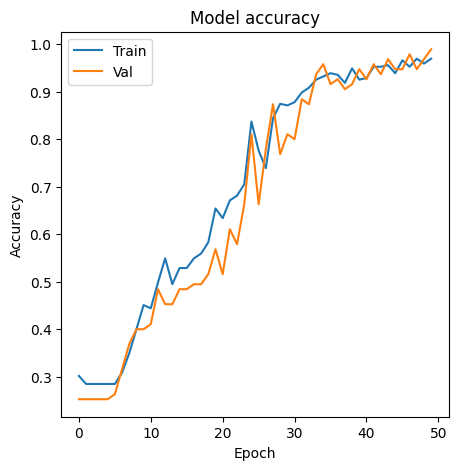

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

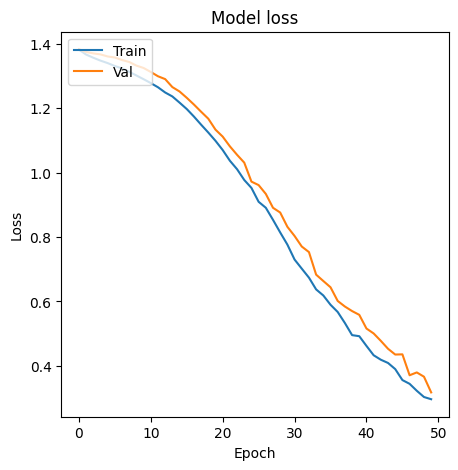

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [14]:
y_pred = model.predict(test_generator)

4/4 [==============================] - 0s 46ms/step


In [15]:
y_pred = np.argmax(y_pred, axis=1)

In [16]:
target_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.13      0.13      0.13        15
     Class 2       0.20      0.20      0.20        10
     Class 3       0.23      0.23      0.23        13
     Class 4       0.17      0.17      0.17        12

    accuracy                           0.18        50
   macro avg       0.18      0.18      0.18        50
weighted avg       0.18      0.18      0.18        50



In [17]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("test loss:",test_loss)
print("test acc:",test_accuracy)

4/4 [==============================] - 0s 52ms/step - loss: 0.2258 - accuracy: 1.0000
test loss: 0.22575752437114716
test acc: 1.0


In [18]:
cm = confusion_matrix(test_generator.classes, y_pred)

In [19]:
cm

array([[2, 3, 6, 4],
       [5, 2, 0, 3],
       [4, 3, 3, 3],
       [4, 2, 4, 2]], dtype=int64)

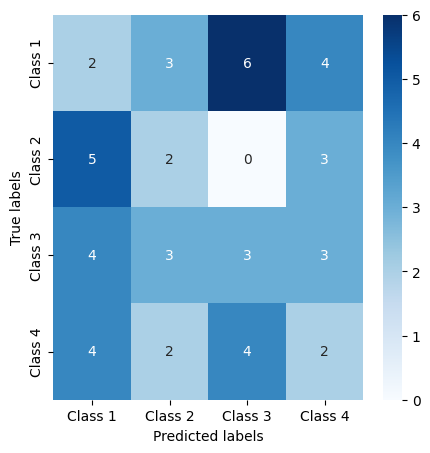

In [20]:
# Create heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(target_names)
ax.set_yticklabels(target_names)
plt.show()

In [ ]:
# test model

1/1 [==============================] - 0s 121ms/step
Predicted Class: 1


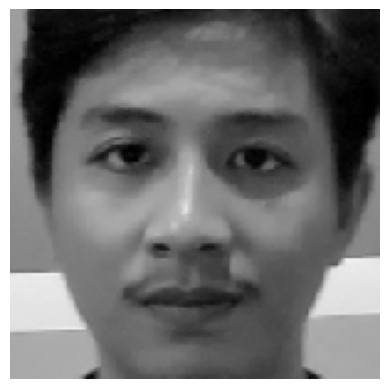

In [21]:
import numpy as np

# Path ke file yang akan diuji
file_path = "F:\CAPSTONE\dataset\PERSON\Test\person2\Sample2_49.jpg"

# Membaca dan memproses gambar
img = tf.keras.preprocessing.image.load_img(file_path, target_size=(150, 150))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi

# Melakukan prediksi
predictions = model.predict(x)

# Mendapatkan label kelas dengan nilai probabilitas tertinggi
predicted_class = np.argmax(predictions[0])

plt.imshow(img)
plt.axis('off')
# Menampilkan hasil prediksi
print("Predicted Class:", predicted_class)
plt.show()

Konvert Model kedalam bentuk tensorflow JS

In [23]:
# Simpan model yang telah dilatih sebagai file Keras HDF5.
saved_model_path = "./my_person_model.h5"
model.save(saved_model_path)

# Konversi model Keras HDF5 ke format TensorFlow.js.
!tensorflowjs_converter --input_format=keras saved_model_path /tmp/tfjs_model


'tensorflowjs_converter' is not recognized as an internal or external command,
operable program or batch file.
